In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

%matplotlib inline

In [3]:
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import f1_score
#from sklearn import cross_validation
#from sklearn.model_selection import cross_validate
import sklearn.tree

In [4]:
# Carga datos
data = pd.read_csv('OJ.csv')

# Remueve datos que no se van a utilizar
data = data.drop(['Store7', 'PctDiscCH','PctDiscMM'],axis=1)

# Crea un nuevo array que sera el target, 0 si MM, 1 si CH
purchasebin = np.ones(len(data), dtype=int)
ii = np.array(data['Purchase']=='MM')
purchasebin[ii] = 0

data['Target'] = purchasebin

# Borra la columna Purchase
data = data.drop(['Purchase'],axis=1)

# Crea un dataframe con los predictores
predictors = list(data.keys())
predictors.remove('Target')
predictors.remove('Unnamed: 0')
#print(predictors)
#print(np.shape(data['Target']))
#print(data)

In [5]:
train, test, y_train, y_test = train_test_split(data, data["Target"], train_size=0.5)

In [6]:
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X[resample_i]
    return X_resample

In [7]:
train_ran=bootstrap_resample(np.array(train))
print(np.shape(train))
print(np.shape(train_ran))

(535, 16)
(535, 16)


In [8]:
N=16
F1_score_av=np.zeros(10)
Fea_imp_av=np.zeros((10,N))
for i in range(100):
    train_ran=bootstrap_resample(np.array(train))
    F1_score=[]
    Fea_imp=[]
    for j in range(1,11):
        clf = sklearn.tree.DecisionTreeClassifier(max_depth=j)
    #    print(clf)
        clf.fit(train_ran,y_train)
    #    plt.figure(figsize=(10,10))
    #    _= sklearn.tree.plot_tree(clf)
        clf.predict(train_ran)
        F1_score=np.append(F1_score,sklearn.metrics.f1_score(y_train, clf.predict(train_ran)))
    #    print("f1: ",sklearn.metrics.f1_score(y_train, clf.predict(X)))
        Fea_imp=np.append(Fea_imp,clf.feature_importances_)
    #    print("imp ",clf.feature_importances_)
 #       print(np.shape(F1_score))
  #      print(np.shape(Fea_imp))
        F1_score_av[j-1]+= F1_score
        Fea_imp_av[j-1]+=Fea_imp
        F1_score=[]
        Fea_imp=[]
F1_score_av= F1_score_av/100
Fea_imp_av=Fea_imp_av/100    

In [9]:
print(np.shape(F1_score_av))
print(np.shape(Fea_imp_av[:,0]))

(10,)
(10,)


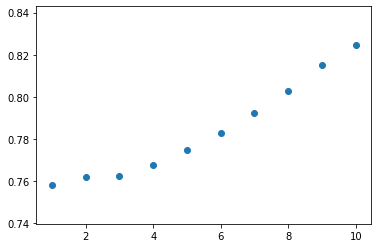

In [10]:
plt.scatter(np.arange(1,11),F1_score_av)
plt.savefig("f1_score.png")

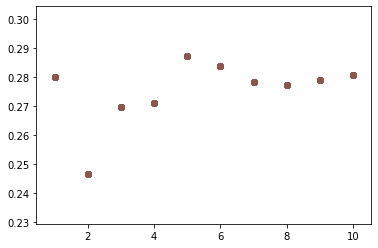

In [11]:
#plt.figure
for i in range(N):
    plt.scatter(np.arange(1,11),Fea_imp_av[:,0],label="{}".format(i))
#plt.savefig("fea_imp.png")